In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_path = Path('/home/calvinhathcock/Documents/College/UNCC/Fall 2022/ITSC 4155/Project/transformed_data')

In [4]:
os.chdir(data_path)

In [6]:
os.listdir()

['counts_wireless_09-19-2021.csv',
 'counts_wireless_09-06-2021.csv',
 'counts_wireless_10-05-2020.csv',
 'counts_wireless_01-09-2021.csv',
 'counts_wireless_06-06-2021.csv',
 'counts_wireless_03-18-2021.csv',
 'counts_wireless_10-07-2020.csv',
 'counts_wireless_03-26-2021.csv',
 'counts_wireless_03-10-2021.csv',
 'counts_wireless_08-31-2021.csv',
 'counts_wireless_05-03-2021.csv',
 'counts_wireless_10-18-2020.csv',
 'counts_wireless_01-11-2021.csv',
 'counts_wireless_12-31-2020.csv',
 'counts_wireless_12-30-2020.csv',
 'counts_wireless_01-19-2021.csv',
 'counts_wireless_11-26-2020.csv',
 'counts_wireless_02-06-2021.csv',
 'counts_wireless_01-02-2021.csv',
 'counts_wireless_04-27-2021.csv',
 'counts_wireless_03-23-2021.csv',
 'counts_wireless_02-21-2021.csv',
 'counts_wireless_03-20-2021.csv',
 'counts_wireless_11-24-2020.csv',
 'counts_wireless_06-12-2021.csv',
 'counts_wireless_01-22-2021.csv',
 'counts_wireless_10-16-2020.csv',
 'counts_wireless_02-15-2021.csv',
 'counts_wireless_04

In [68]:
df = pd.read_csv('counts_wireless_08-29-2021.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'counts_wireless_08-29-2021.csv'

[Atki    24
 Rece    24
 HunH    24
 Irwi    24
 Auxi    24
         ..
 Nine     7
 FouA     6
 Foun     4
 East     1
 FacA     1
 Name: building, Length: 83, dtype: int64]

In [54]:
buildings_of_interest = ['Atki', 'StuU', 'Bioi']

In [55]:
df = df.loc[df['building'].isin(buildings_of_interest)]

In [56]:
df['timestamp'] = pd.to_datetime(df.timestamp)

In [57]:
df['hour'] = df.timestamp.dt.hour

<AxesSubplot:xlabel='hour', ylabel='count'>

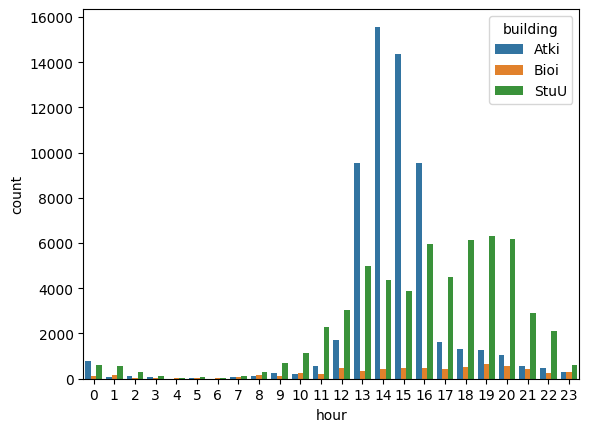

In [58]:
sns.barplot(data = df, x = 'hour', y = 'count', hue = 'building')

In [72]:
df['timestamp'].dt.day_name()[0]

'Sunday'

In [80]:
str(df['timestamp'].dt.date[0])

'2021-08-29'

In [83]:
def plot_building_comparison(file):
    df = pd.read_csv(file)
    buildings_of_interest = ['Atki', 'StuU', 'Bioi']
    df = df.loc[df['building'].isin(buildings_of_interest)]
    df['timestamp'] = pd.to_datetime(df.timestamp)
    df['hour'] = df.timestamp.dt.hour
    date = str(df['timestamp'].dt.date[0])
    day_name = df['timestamp'].dt.day_name()[0]
    g = sns.barplot(data = df, x = 'hour', y = 'count', hue = 'building').set(title = day_name + ' ' + date)

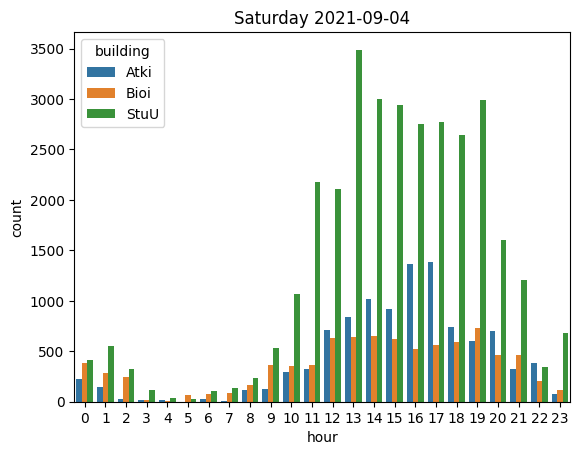

In [85]:
plot_building_comparison('counts_wireless_09-04-2021.csv')

In [6]:
def plot_distribution(file):
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df.timestamp)
    df['hour'] = df.timestamp.dt.hour
    date = str(df['timestamp'].dt.date[0])
    day_name = df['timestamp'].dt.day_name()[0]
    g = sns.barplot(data = df, x = 'hour', y = 'count').set(title = day_name + ' ' + date)

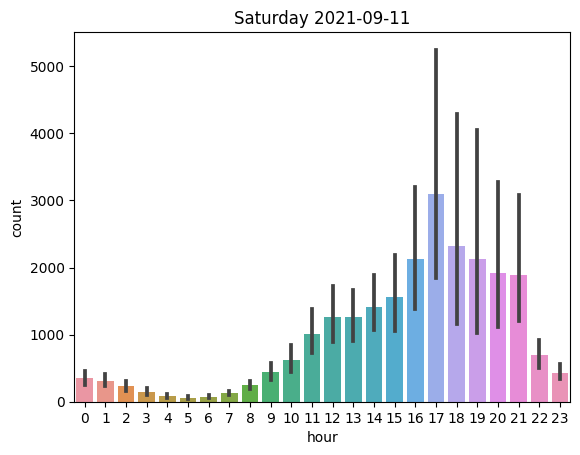

In [16]:
plot_distribution('counts_wireless_09-11-2021.csv')

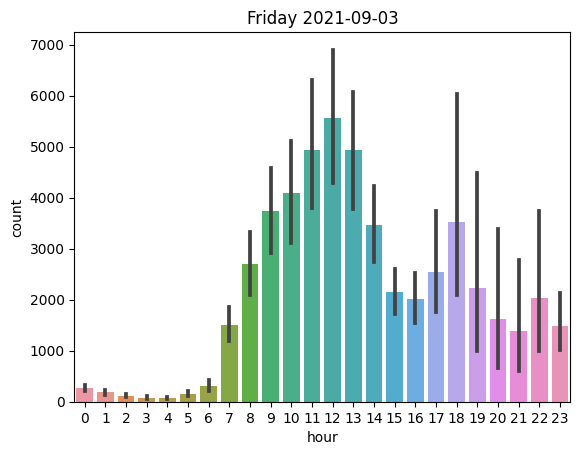

In [10]:
plot_distribution('counts_wireless_09-03-2021.csv')

### Combined CSV

In [2]:
os.getcwd()

'/home/calvinhathcock/Documents/College/UNCC/Fall 2022/ITSC 4155/Project/ETL/notebooks'

In [69]:
df = pd.read_csv('../data_files/wifi_counts_combined.csv')

In [59]:
def expand_dates(df):
    df['timestamp'] = pd.to_datetime(df.timestamp)
    df['year'] = df['timestamp'].dt.year
    df['year'] = df['year'].astype('str')
    df['month'] = df['timestamp'].dt.month
    df['month_name'] = df['timestamp'].dt.month_name()
    df['day'] = df['timestamp'].dt.day
    df['day_name'] = df['timestamp'].dt.day_name()
    df['hour'] = df['timestamp'].dt.hour
    df['month_year'] = df['month_name'] + ' ' + df['year']
    return df

In [60]:
expand_dates(df)

,timestamp,Atki,Auxi,BaTF,Band,Barn,BelG,BelH,Bioi,Burs,...,Winn,With,Wood,year,month,day,day_name,hour,month_name,month_year
0,2020-09-28 00:00:00,76.0,20.0,22.0,4.0,6.0,6.0,702.0,86.0,42.0,...,2.0,392.0,60.0,2020,9,28,Monday,0,September,September 2020
1,2020-09-28 01:00:00,24.0,8.0,0.0,38.0,16.0,0.0,518.0,14.0,46.0,...,20.0,316.0,8.0,2020,9,28,Monday,1,September,September 2020
2,2020-09-28 02:00:00,26.0,12.0,4.0,16.0,2.0,4.0,416.0,22.0,10.0,...,14.0,22.0,16.0,2020,9,28,Monday,2,September,September 2020
3,2020-09-28 03:00:00,32.0,8.0,8.0,0.0,78.0,58.0,398.0,22.0,46.0,...,26.0,18.0,82.0,2020,9,28,Monday,3,September,September 2020
4,2020-09-28 04:00:00,44.0,0.0,0.0,0.0,70.0,2.0,332.0,12.0,46.0,...,30.0,20.0,24.0,2020,9,28,Monday,4,September,September 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8537,2021-09-28 19:00:00,3844.0,1740.0,752.0,516.0,926.0,7865.0,2112.0,1382.0,3306.0,...,1132.0,740.0,5660.0,2021,9,28,Tuesday,19,September,September 2021
8538,2021-09-28 20:00:00,2876.0,1204.0,1040.0,570.0,640.0,4196.0,1958.0,988.0,2706.0,...,1212.0,566.0,3569.0,2021,9,28,Tuesday,20,September,September 2021
8539,2021-09-28 21:00:00,1540.0,674.0,498.0,358.0,336.0,732.0,1840.0,752.0,1758.0,...,848.0,607.0,1962.0,2021,9,28,Tuesday,21,September,September 2021
8540,2021-09-28 22:00:00,1062.0,424.0,456.0,296.0,134.0,652.0,1456.0,402.0,920.0,...,192.0,486.0,450.0,2021,9,28,Tuesday,22,September,September 2021


In [62]:
grouped = df.groupby(['month_year'], as_index=False).Wood.sum()

In [63]:
grouped

,month_year,Wood
0,April 2021,621383.0
1,August 2021,1088527.0
2,December 2020,438356.0
3,February 2021,545579.0
4,January 2021,448156.0
5,July 2021,652105.0
6,June 2021,570997.0
7,March 2021,703174.0
8,May 2021,528947.0
9,November 2020,480183.0


<AxesSubplot:xlabel='month_year', ylabel='Wood'>

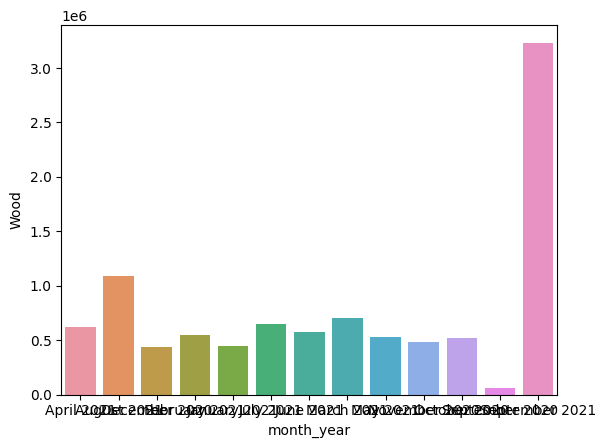

In [64]:
sns.barplot(data = grouped, x = 'month_year', y = 'Wood')

### Bleh bleh bleh

In [140]:
df

,timestamp,Atki,Auxi,BaTF,Band,Barn,BelG,BelH,Bioi,Burs,...,StuU,Syca,Tenn,UREC,Unio,Wach,Wall,Winn,With,Wood
0,2020-09-28 00:00:00,76.0,20.0,22.0,4.0,6.0,6.0,702.0,86.0,42.0,...,140.0,10.0,60.0,90.0,14.0,8.0,56.0,2.0,392.0,60.0
1,2020-09-28 01:00:00,24.0,8.0,0.0,38.0,16.0,0.0,518.0,14.0,46.0,...,48.0,14.0,12.0,80.0,8.0,70.0,22.0,20.0,316.0,8.0
2,2020-09-28 02:00:00,26.0,12.0,4.0,16.0,2.0,4.0,416.0,22.0,10.0,...,22.0,12.0,56.0,108.0,16.0,12.0,16.0,14.0,22.0,16.0
3,2020-09-28 03:00:00,32.0,8.0,8.0,0.0,78.0,58.0,398.0,22.0,46.0,...,18.0,0.0,18.0,194.0,4.0,6.0,4.0,26.0,18.0,82.0
4,2020-09-28 04:00:00,44.0,0.0,0.0,0.0,70.0,2.0,332.0,12.0,46.0,...,118.0,4.0,6.0,276.0,0.0,24.0,20.0,30.0,20.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8537,2021-09-28 19:00:00,3844.0,1740.0,752.0,516.0,926.0,7865.0,2112.0,1382.0,3306.0,...,11904.0,522.0,3648.0,20979.0,1046.0,583.0,1030.0,1132.0,740.0,5660.0
8538,2021-09-28 20:00:00,2876.0,1204.0,1040.0,570.0,640.0,4196.0,1958.0,988.0,2706.0,...,9298.0,348.0,2555.0,21942.0,834.0,1182.0,793.0,1212.0,566.0,3569.0
8539,2021-09-28 21:00:00,1540.0,674.0,498.0,358.0,336.0,732.0,1840.0,752.0,1758.0,...,5111.0,260.0,1724.0,18706.0,855.0,982.0,500.0,848.0,607.0,1962.0
8540,2021-09-28 22:00:00,1062.0,424.0,456.0,296.0,134.0,652.0,1456.0,402.0,920.0,...,2562.0,162.0,894.0,8888.0,434.0,628.0,360.0,192.0,486.0,450.0


In [75]:
cols = df.columns[1:]

In [76]:
cols

Index(['Atki', 'Auxi', 'BaTF', 'Band', 'Barn', 'BelG', 'BelH', 'Bioi', 'Burs',
       'Cafe', 'Came', 'Cato', 'Ceda', 'CoEd', 'Colv', 'Cone', 'Coun', 'Denn',
       'Duke', 'EPIC', 'FOPS', 'Faci', 'Foun', 'Fret', 'Frid', 'Gage', 'Gari',
       'Grig', 'Harr', 'Heal', 'Hick', 'Hous', 'HunH', 'Irwi', 'JBui', 'Kenn',
       'King', 'Laur', 'Levi', 'Lync', 'MSII', 'Macy', 'Mart', 'McCo', 'McMi',
       'Memo', 'MilH', 'Milt', 'NERF', 'PORT', 'Phil', 'Pros', 'Rece', 'Rees',
       'Robi', 'Rowe', 'SVDH', 'Scot', 'Smit', 'SoTF', 'Stor', 'StuA', 'StuH',
       'StuU', 'Syca', 'Tenn', 'UREC', 'Unio', 'Wach', 'Wall', 'Winn', 'With',
       'Wood'],
      dtype='object')

In [141]:
df_agg = df[cols].aggregate(['sum'], axis = 1)

In [142]:
df_agg['timestamp'] = pd.to_datetime(df.timestamp)

In [143]:
df_agg['month'] = df_agg['timestamp'].dt.month.astype('str') + ' ' + df_agg['timestamp'].dt.year.astype('str')


In [144]:
df_agg

,sum,timestamp,month
0,5861.0,2020-09-28 00:00:00,9 2020
1,3465.0,2020-09-28 01:00:00,9 2020
2,2659.0,2020-09-28 02:00:00,9 2020
3,3259.0,2020-09-28 03:00:00,9 2020
4,3005.0,2020-09-28 04:00:00,9 2020
...,...,...,...
8537,237628.0,2021-09-28 19:00:00,9 2021
8538,182734.0,2021-09-28 20:00:00,9 2021
8539,104622.0,2021-09-28 21:00:00,9 2021
8540,62645.0,2021-09-28 22:00:00,9 2021


In [145]:
df_agg = df_agg.groupby(['month']).sum()

In [146]:
df_agg

,sum
month,
1 2021,14498994.0
10 2020,26668520.0
11 2020,22729799.0
12 2020,14042125.0
2 2021,19596467.0
3 2021,30402285.0
4 2021,30153455.0
5 2021,20085220.0
6 2021,14946305.0


In [147]:
df_agg = df_agg.reset_index()

In [148]:
df_agg.month

0      1 2021
1     10 2020
2     11 2020
3     12 2020
4      2 2021
5      3 2021
6      4 2021
7      5 2021
8      6 2021
9      7 2021
10     8 2021
11     9 2020
12     9 2021
Name: month, dtype: object

In [149]:
string = df_agg['month'][0]

In [151]:
from datetime import date

In [154]:
string[:1]

'1'

In [156]:
string[2:]

'2021'

In [157]:
string[:1]

'1'

In [126]:
date(year = int(string[2:]), month = int(string[:1]), day = 1)

datetime.date(2021, 1, 1)

In [158]:
df_agg['date'] = df_agg['month'].apply( lambda x: date(year = int(x[2:]), month = int(x[:1]), day = 1))

In [159]:
df_agg

,month,sum,date
0,1 2021,14498994.0,2021-01-01
1,10 2020,26668520.0,2020-01-01
2,11 2020,22729799.0,2020-01-01
3,12 2020,14042125.0,2020-01-01
4,2 2021,19596467.0,2021-02-01
5,3 2021,30402285.0,2021-03-01
6,4 2021,30153455.0,2021-04-01
7,5 2021,20085220.0,2021-05-01
8,6 2021,14946305.0,2021-06-01
9,7 2021,16471100.0,2021-07-01


In [132]:
df_agg = df_agg.drop(columns = ['month'])

In [136]:
df_agg = df_agg.sort_values('date')

In [139]:
df_agg

,sum,date
1,26668520.0,2020-01-01
2,22729799.0,2020-01-01
3,14042125.0,2020-01-01
11,2581850.0,2020-09-01
0,14498994.0,2021-01-01
4,19596467.0,2021-02-01
5,30402285.0,2021-03-01
6,30153455.0,2021-04-01
7,20085220.0,2021-05-01
8,14946305.0,2021-06-01


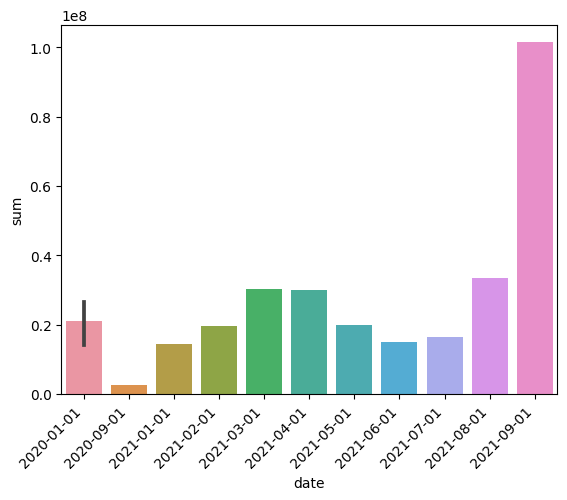

In [138]:
chart = sns.barplot(data = df_agg, x = 'date', y = 'sum')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()